In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Data Load and Processing:

In [137]:
#load each dataset
df_normal = pd.read_csv("../Data/ptbdb_normal.csv" , header=None)
df_abnormal = pd.read_csv("../Data/ptbdb_abnormal.csv", header=None)
df_train = pd.read_csv("../Data/mitbih_train.csv", header=None)
df_test = pd.read_csv("../Data/mitbih_test.csv", header=None)

In [138]:
#check the dimensions of each dataset
print(df_normal.shape)
print(df_abnormal.shape)
print(df_train.shape)
print(df_test.shape)

(4046, 188)
(10506, 188)
(87554, 188)
(21892, 188)


In [209]:
#check the first few rows of each dataset
print(df_normal.head())
print(df_abnormal.head())
print(df_train.head())
print(df_test.head())

1         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.

## Replacing Zeros with Nan

Columns with missing values:
Series([], dtype: int64)


## Distribution of Labels: 

In [143]:
print(df_train.iloc[:, -1].value_counts())
print(df_test.iloc[:,-1].value_counts())

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64
187
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: count, dtype: int64


In [ ]:
print(df_normal.iloc[:, -1].value_counts())
print(df_abnormal.iloc[:,-1].value_counts())

In [145]:
# Map PTB labels to align with MIT-BIH labels
df_normal.iloc[:, -1] = 0  # Normal -> 'N' (0)
df_abnormal.iloc[:, -1] = 4  # Abnormal -> 'Q' (4)

In [146]:
print("PTB Normal Labels (after mapping):")
print(df_normal.iloc[:, -1].value_counts())

print("\nPTB Abnormal Labels (after mapping):")
print(df_abnormal.iloc[:, -1].value_counts())

PTB Normal Labels (after mapping):
187
0.0    4046
Name: count, dtype: int64

PTB Abnormal Labels (after mapping):
187
4.0    10506
Name: count, dtype: int64


In [147]:
print(df_normal.iloc[:, -1].unique())
print(df_abnormal.iloc[:,-1].unique())

nan_rows = df_test.iloc[:,-1].isna().any()


print(df_train.iloc[:,-1].unique())
print(df_test.iloc[:,-1].unique())


[0.]
[4.]
[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


In [150]:
df_ptb_combined = pd.concat([df_normal, df_abnormal])

df_mit_combined = pd.concat([df_train, df_test])


print(df_ptb_combined.iloc[:, -1].unique())
print(df_mit_combined.iloc[:,-1].unique())

#Concatenate PTB with MIT-BIH datasets
df_combined = pd.concat([df_mit_combined, df_ptb_combined], axis=0)


[0. 4.]
[0. 1. 2. 3. 4.]


In [151]:
print(df_combined.iloc[:,-1].value_counts())

187
0.0    94635
4.0    18545
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64


## Basic Statistical Analysis:

In [171]:
#Basic Statistics for all features
overall_stats = df_combined.iloc[:, :-1].describe()

print("Statistical Measures for the Entire Dataset:")
print(overall_stats)

# check for missing values
missing_values = df_combined.isnull().sum()
print("\nMissing values in each colmn:")
print(missing_values[missing_values >0])

Statistical Measures for the Entire Dataset:
                 0              1              2              3    \
count  123998.000000  123998.000000  123998.000000  123998.000000   
mean        0.901200       0.754538       0.421991       0.222336   
std         0.227138       0.218680       0.230383       0.212775   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.930147       0.665443       0.245128       0.049244   
50%         0.992308       0.819217       0.423664       0.166667   
75%         1.000000       0.909253       0.578067       0.342013   
max         1.000000       1.000000       1.000000       1.000000   

                 4              5              6              7    \
count  123998.000000  123998.000000  123998.000000  123998.000000   
mean        0.201939       0.211020       0.207502       0.204301   
std         0.182476       0.174499       0.178728       0.177164   
min         0.000000       0.000000       0.000000       

## Class Distribution:

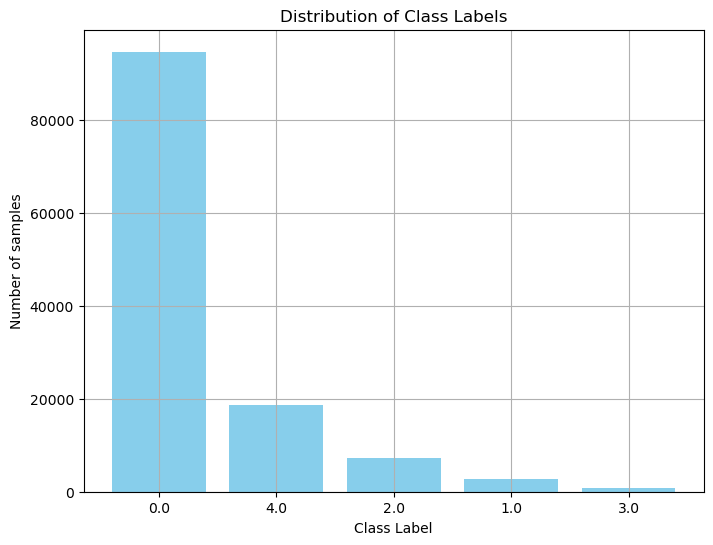

In [175]:
import matplotlib.pyplot as plt

label_distribution = df_combined.iloc[:,-1].value_counts()

plt.figure(figsize=(8,6))
plt.bar(label_distribution.index.astype(str), label_distribution.values, color = 'skyblue')
plt.xlabel("Class Label")
plt.ylabel("Number of samples")
plt.title("Distribution of Class Labels")
plt.grid(True)
plt.show()

## Visualization of Time Series for Each Class: 

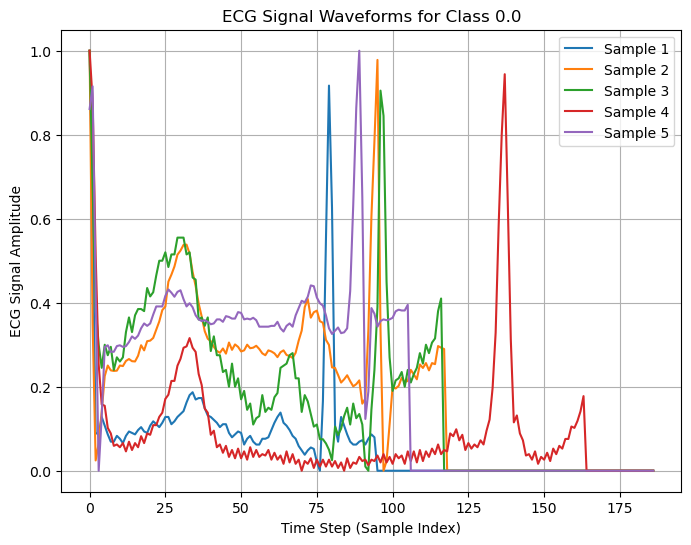

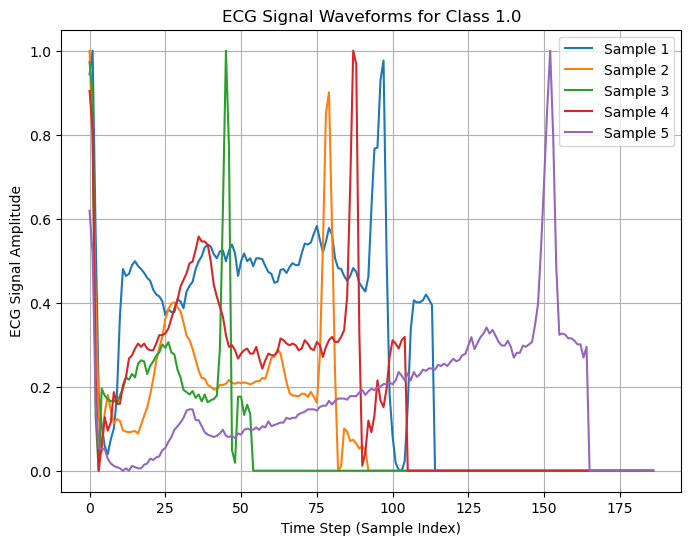

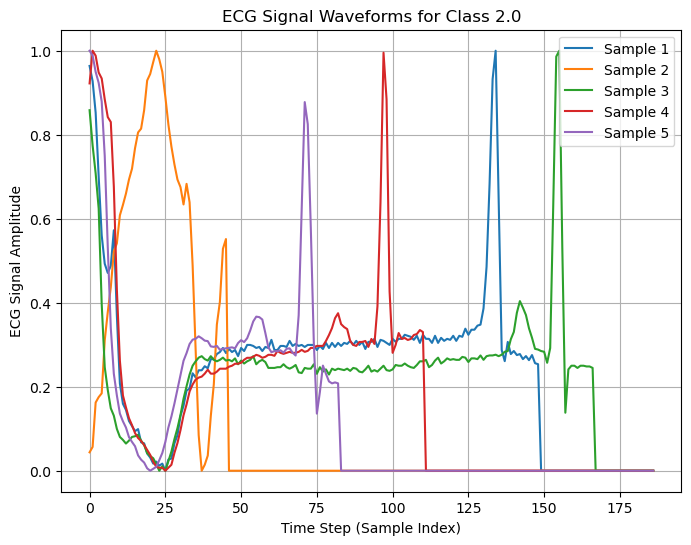

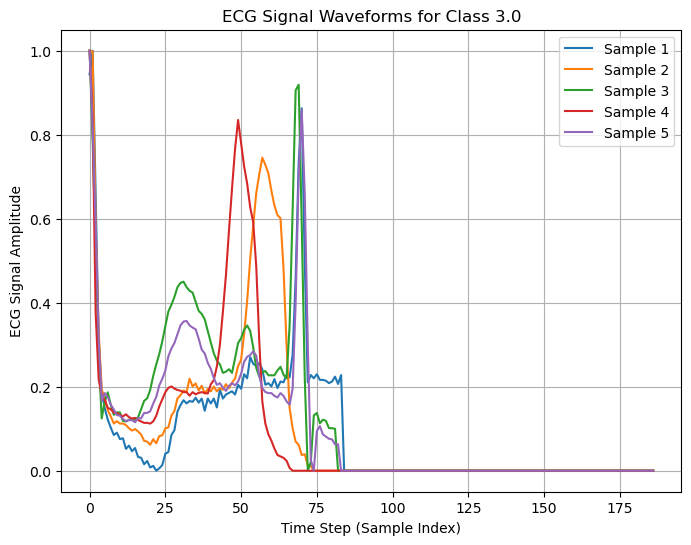

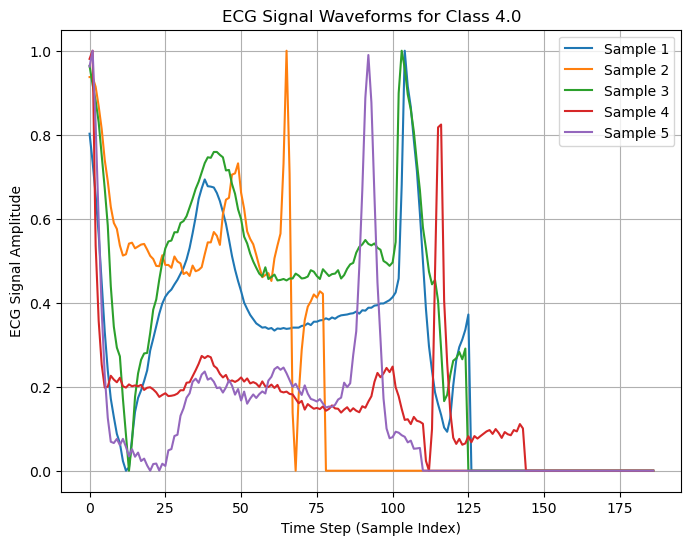

In [177]:
# Plot random samples from each class
for label in df_combined.iloc[:, -1].unique():
    plt.figure(figsize=(8, 6))
    sample_signals = df_combined[df_combined.iloc[:, -1] == label].iloc[:, :-1].sample(5, random_state=42)
    
    for i, signal in enumerate(sample_signals.values):
        plt.plot(signal, label=f"Sample {i+1}")
    
    plt.xlabel('Time Step (Sample Index)')
    plt.ylabel('ECG Signal Amplitude')
    plt.title(f'ECG Signal Waveforms for Class {label}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Featrure Analysis: 

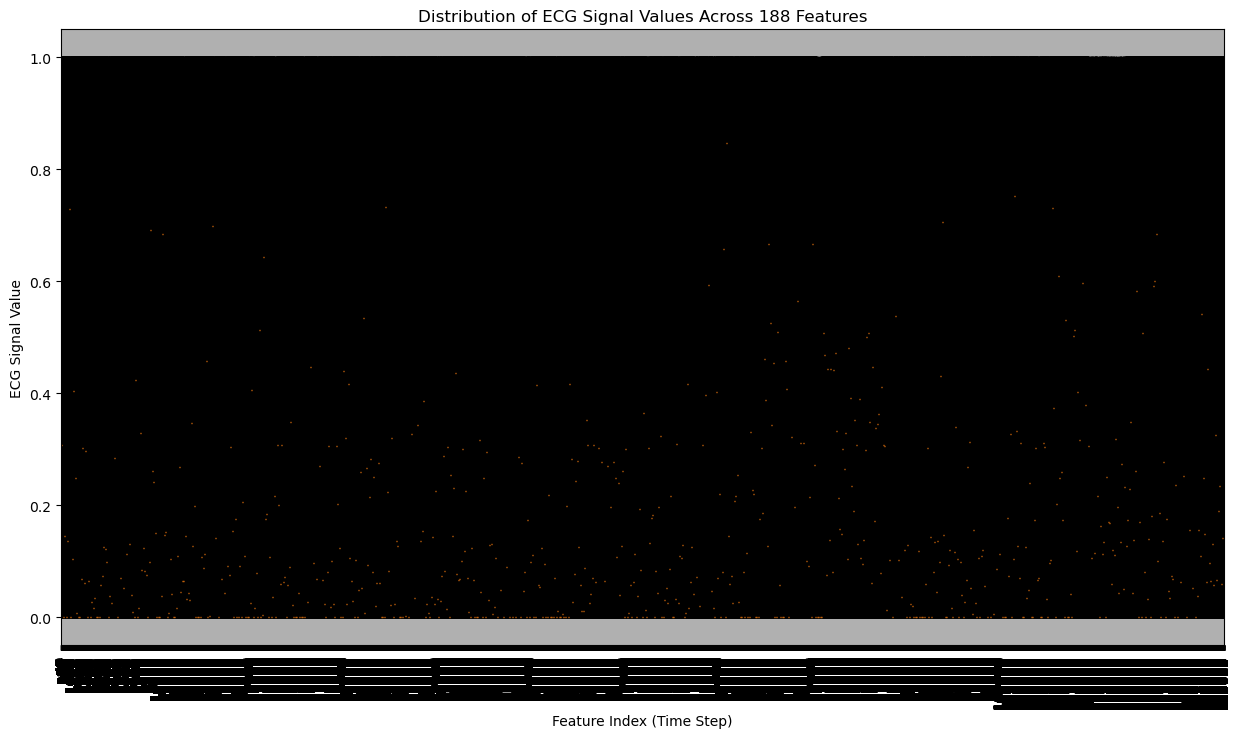

In [179]:
# Box plots for feature-wise distribution across all samples
plt.figure(figsize=(15, 8))
plt.boxplot(df_combined.iloc[:, :-1].values.T, widths=0.6, showfliers=False)
plt.title('Distribution of ECG Signal Values Across 188 Features')
plt.xlabel('Feature Index (Time Step)')
plt.ylabel('ECG Signal Value')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


## Time Series Characteristics:

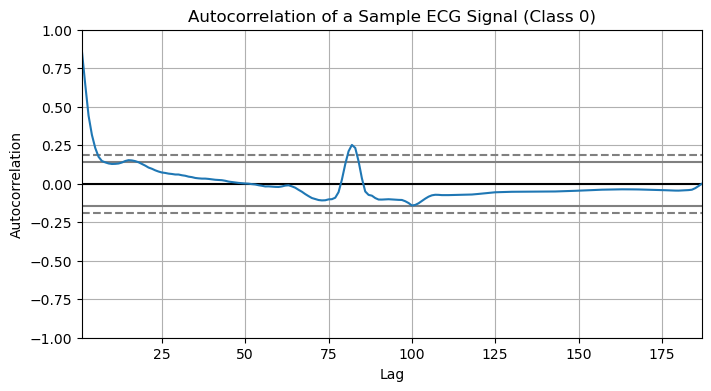

In [182]:
from pandas.plotting import autocorrelation_plot

# Autocorrelation for a sample ECG signal from class 0
sample_signal = df_combined[df_combined.iloc[:,-1] == 0] .iloc[0,:-1]

plt.figure(figsize=(8,4))
autocorrelation_plot(sample_signal)
plt.title('Autocorrelation of a Sample ECG Signal (Class 0)')
plt.show()

## Frequency Domain Analysis: 

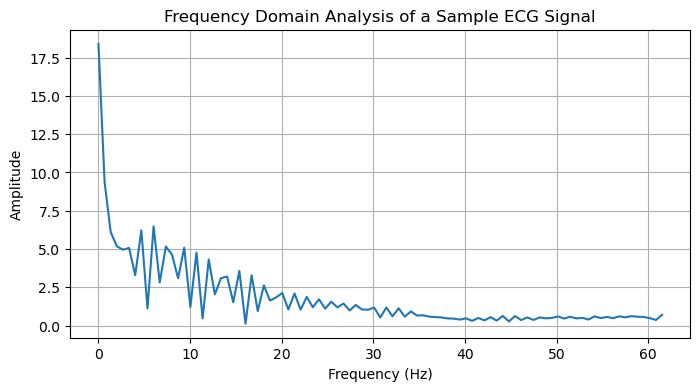

In [183]:
import numpy as np

# FFT of a sample ECG signal
sample_signal = df_combined.iloc[0, :-1]

# Perform FFT
fft_values = np.fft.fft(sample_signal)
fft_freq = np.fft.fftfreq(len(sample_signal), d=1/125)  # Assuming 125 Hz sampling rate

# Plot the FFT results
plt.figure(figsize=(8, 4))
plt.plot(fft_freq[:len(fft_freq)//2], np.abs(fft_values)[:len(fft_values)//2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Analysis of a Sample ECG Signal')
plt.grid(True)
plt.show()

## Feature Engineering for Time Series Data: 

In [184]:
# Add statistical features for each sample
df_features = df_combined.copy()

df_features['mean'] = df_combined.iloc[:, :-1].mean(axis=1)
df_features['std'] = df_combined.iloc[:, :-1].std(axis=1)
df_features['min'] = df_combined.iloc[:, :-1].min(axis=1)
df_features['max'] = df_combined.iloc[:, :-1].max(axis=1)
df_features['median'] = df_combined.iloc[:, :-1].median(axis=1)
df_features['iqr'] = df_combined.iloc[:, :-1].quantile(0.75, axis=1) - df_combined.iloc[:, :-1].quantile(0.25, axis=1)


## Time-domain Features:

In [185]:
from scipy.stats import skew, kurtosis

df_features['zero_crossings'] = df_combined.iloc[:, :-1].apply(lambda x: np.sum(np.diff(np.sign(x)) != 0), axis=1)
df_features['skewness'] = df_combined.iloc[:, :-1].apply(lambda x: skew(x), axis=1)
df_features['kurtosis'] = df_combined.iloc[:, :-1].apply(lambda x: kurtosis(x), axis=1)


## Frequency-Domain Features:

In [186]:
# Add frequency domain features
def fft_features(row):
    fft_vals = np.fft.fft(row)
    fft_mag = np.abs(fft_vals)
    return np.mean(fft_mag), np.std(fft_mag), np.max(fft_mag)

df_features[['fft_mean', 'fft_std', 'fft_max']] = df_combined.iloc[:, :-1].apply(lambda row: fft_features(row), axis=1, result_type='expand')


## Keep A Test Set Separate:

In [199]:
from sklearn.model_selection import train_test_split

# Separate features and labels from df_combined
X = df_combined.iloc[:, :-1]  # All columns except the last one as features
y = df_combined.iloc[:, -1]    # The last column as labels

# Separate the test set first
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,  test_size=0.3, random_state=42, stratify=y)

print(f"Training + Validation set size: {X_train_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training + Validation set size: 86798
Test set size: 37200


In [200]:
# Check the distribution of class labels in the test set
test_label_distribution = y_test.value_counts()

print("Class Distribution in the Test Set:")
print(test_label_distribution)

Class Distribution in the Test Set:
187
0.0    28391
4.0     5563
2.0     2171
1.0      834
3.0      241
Name: count, dtype: int64


## General Augmentation Techniques:

In [193]:
import numpy as np
from scipy.interpolate import interp1d

def time_shift(signal, shift_max:10):
    shift = np.random.randint(-shift_max, shift_max)
    return np.roll(signal, shift)


def add_noise(signal, noise_level: 0.05):
    noise = np.random.normal(0, noise_level, size = signal.shape)
    return signal + noise

def scale_signal(signal, scale_range=(0.8, 1.2)):
    scale = np.random.uniform(scale_range[0], scale_range[1])
    return signal*scale

def time_wrap(signal, sigma = 0.1):
    orig_steps = np.arrange(signal.shape[0])
    random_wrap = np.random.normal(loc = 1.0, scale=sigma, size = signal.shape[0])
    new_steps = np.cumsum(random_wrap)
    new_steps = (new_steps - new_steps.min()) / (new_steps.max() - new_steps.min())* (len(signal) -1)

    interpolator =  interp1d(new_steps, signal, kind='linear', fill_value="extrapolate")
    return interpolator(orig_steps)

def random_crop(signal , crop_size=20):
    start = np.random.randint(0, len(signal)- crop_size)
    cropped = signal[start:start + crop_size]
    return np.pad(cropped, (0, len(signal) - crop_size), 'constant')
#df_combined.iloc[:, :-1] = df_combined.iloc[:, :-1].apply(lambda row: time_shift(row), axis=1)

In [194]:
import numpy as np

def augment_signal(signal):
    # Apply augmentations with a certain probability
    if np.random.rand() < 0.5:
        signal = time_shift(signal)
    if np.random.rand() < 0.5:
        signal = add_noise(signal)
    if np.random.rand() < 0.5:
        signal = scale_signal(signal)
    if np.random.rand() < 0.3:  # Lower probability for stronger augmentations
        signal = time_warp(signal)

## Advanced Augmentation Techniques for Underrepresented Classes: 

### Identify Underrepresented Classes:

In [195]:
# Check the class distribution
label_distribution = df_combined.iloc[:, -1].value_counts()
print(label_distribution)

# Identify classes with fewer samples
minority_classes = label_distribution[label_distribution < 5000].index
print(f"Minority Classes: {minority_classes}")


187
0.0    94635
4.0    18545
2.0     7236
1.0     2779
3.0      803
Name: count, dtype: int64
Minority Classes: Index([1.0, 3.0], dtype='float64', name=187)


## Gussian Mixture Model: 

In [197]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np


def generate_synthetic_data_gmm(df, label, target_samples=5000, n_components=5, random_state=42):
    """
    Generate synthetic ECG data using Gaussian Mixture Models (GMM) for a specific class.
    """
    synthetic_data = []

    # Extract data for the specified class
    class_data = df[df.iloc[:, -1] == label].iloc[:, :-1].values
    
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components, random_state=random_state)
    gmm.fit(class_data)
    
    # Generate synthetic samples
    synthetic_samples = gmm.sample(target_samples)[0]
    
    # Create labeled synthetic data
    synthetic_labels = np.full((synthetic_samples.shape[0], 1), label)
    synthetic_class_data = np.hstack((synthetic_samples, synthetic_labels))
    synthetic_data.append(synthetic_class_data)

    # Convert to DataFrame
    df_synthetic = pd.DataFrame(np.vstack(synthetic_data))
    return df_synthetic


In [181]:
labels = df_combined.iloc[:,-1]

class_stats = {}

for label in labels.unique():
    class_data = df_combined[df_combined.iloc[:,-1] == label].iloc[:, :-1] 
    class_stats[label] = class_data.describe()
    
for label, stats in class_stats.items():
    print(f"\nStatistical Measures for Class {label}:")
    print(stats)


Statistical Measures for Class 0.0:
                0             1             2             3             4    \
count  94635.000000  94635.000000  94635.000000  94635.000000  94635.000000   
mean       0.918750      0.775662      0.399802      0.175320      0.161093   
std        0.206372      0.196313      0.213833      0.164090      0.130565   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.945409      0.709677      0.236111      0.038110      0.072657   
50%        0.997449      0.829730      0.404348      0.129771      0.130435   
75%        1.000000      0.909618      0.552252      0.275882      0.215190   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  94635.000000  94635.000000  94635.000000  94635.000000  94635.000000   
mean       0.178285      0.178961      0.179725      0.182317      0.187339   
std        0.1

## TimeGan Generator

In [ ]:
from src.timegan_generator import generate_synthetic_data_timegan


In [ ]:
# Import the CNNLSTMClassifier class
from src.cnn_lstm_classifier import CNNLSTMClassifier

# Initialize the classifier
model = CNNLSTMClassifier(input_shape=(188, 1), num_classes=5, learning_rate=1e-3, batch_size=32, epochs=50)

# Train the model
model.fit(X_train, y_train, X_val, y_val)

# Evaluate on the test set
model.evaluate(X_test, y_test)

# Visualize the training history
model.plot_history()


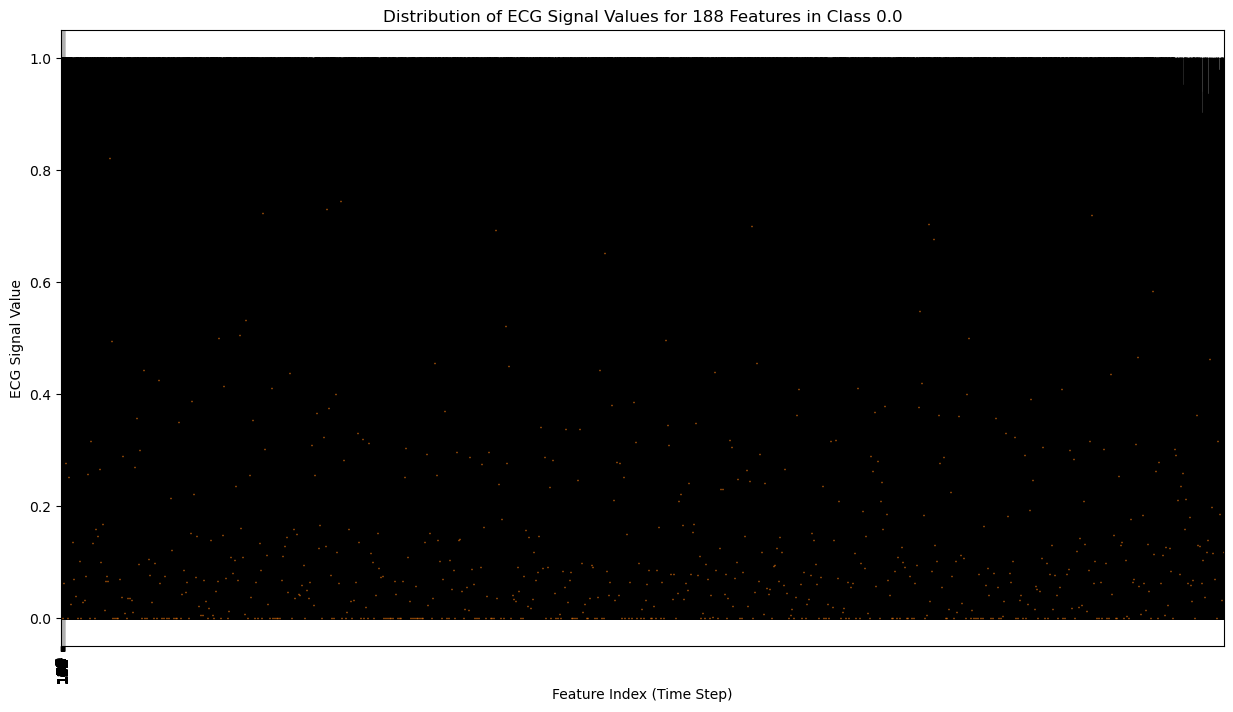

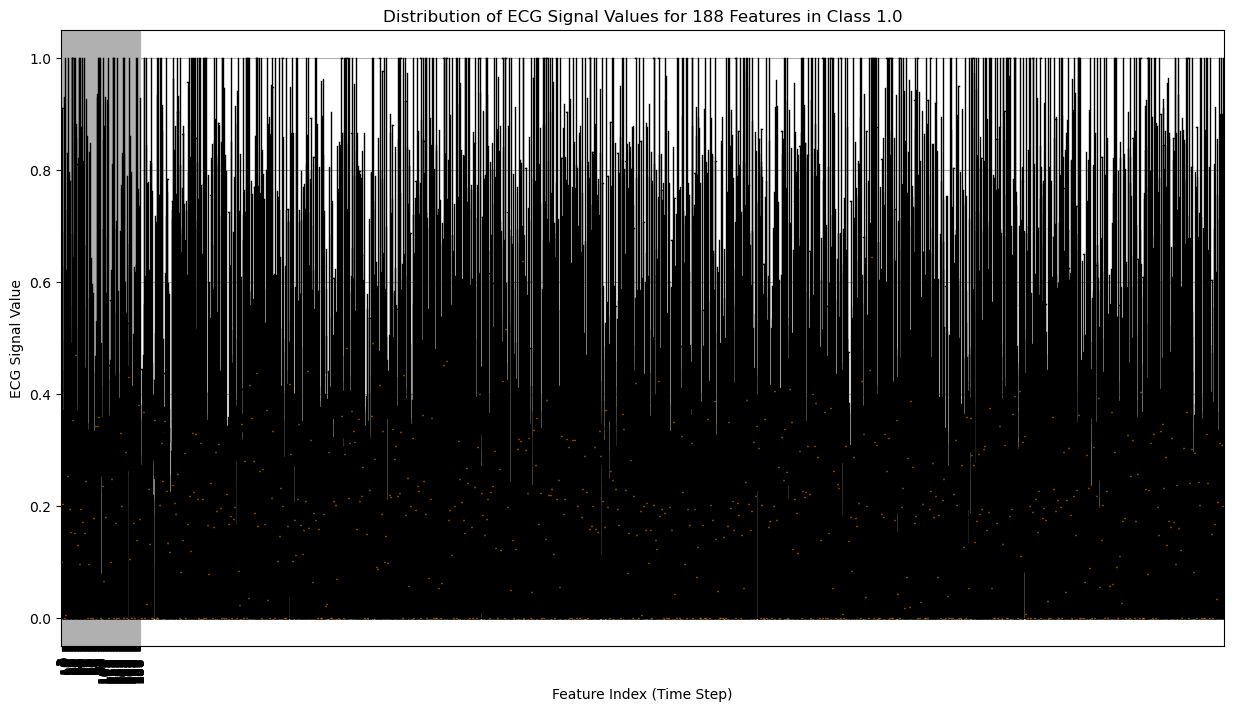

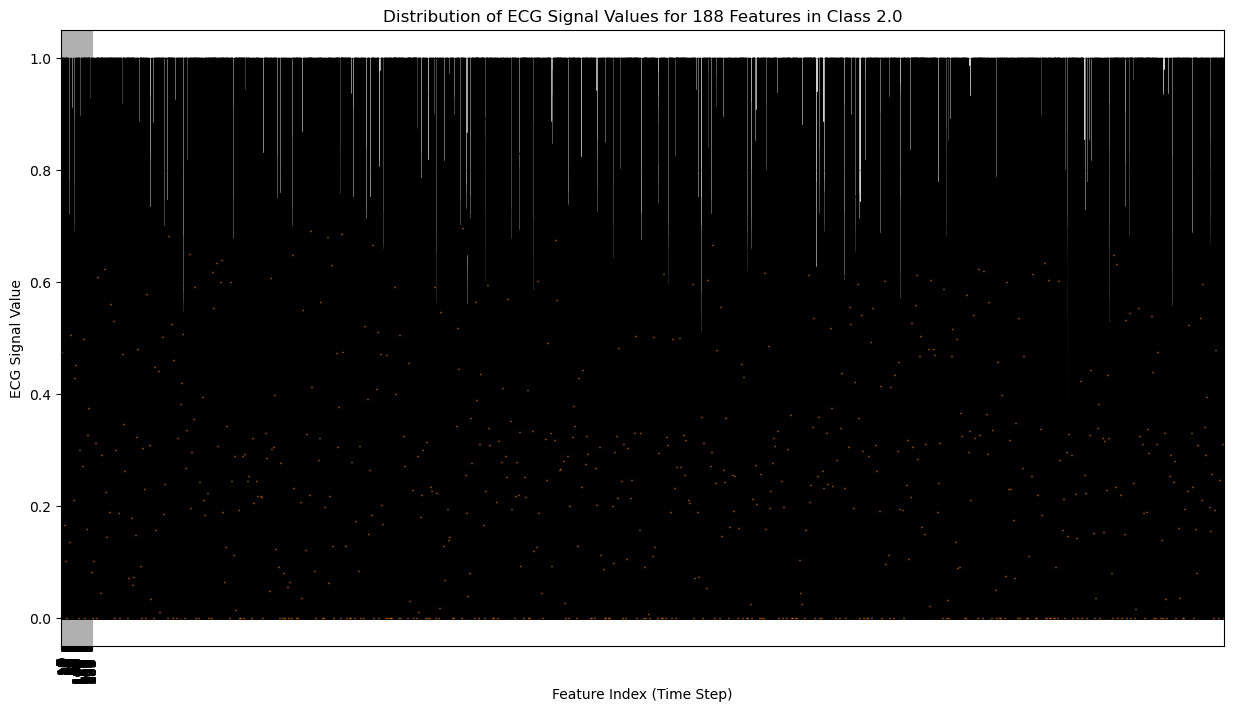

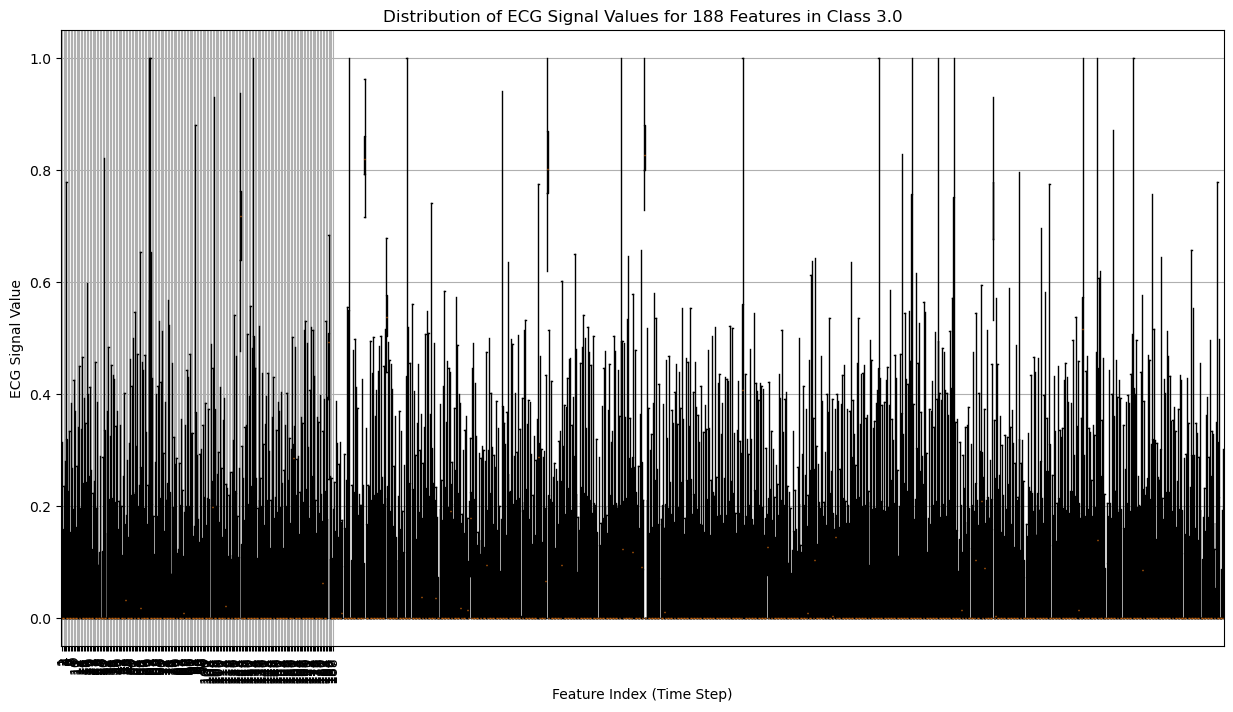

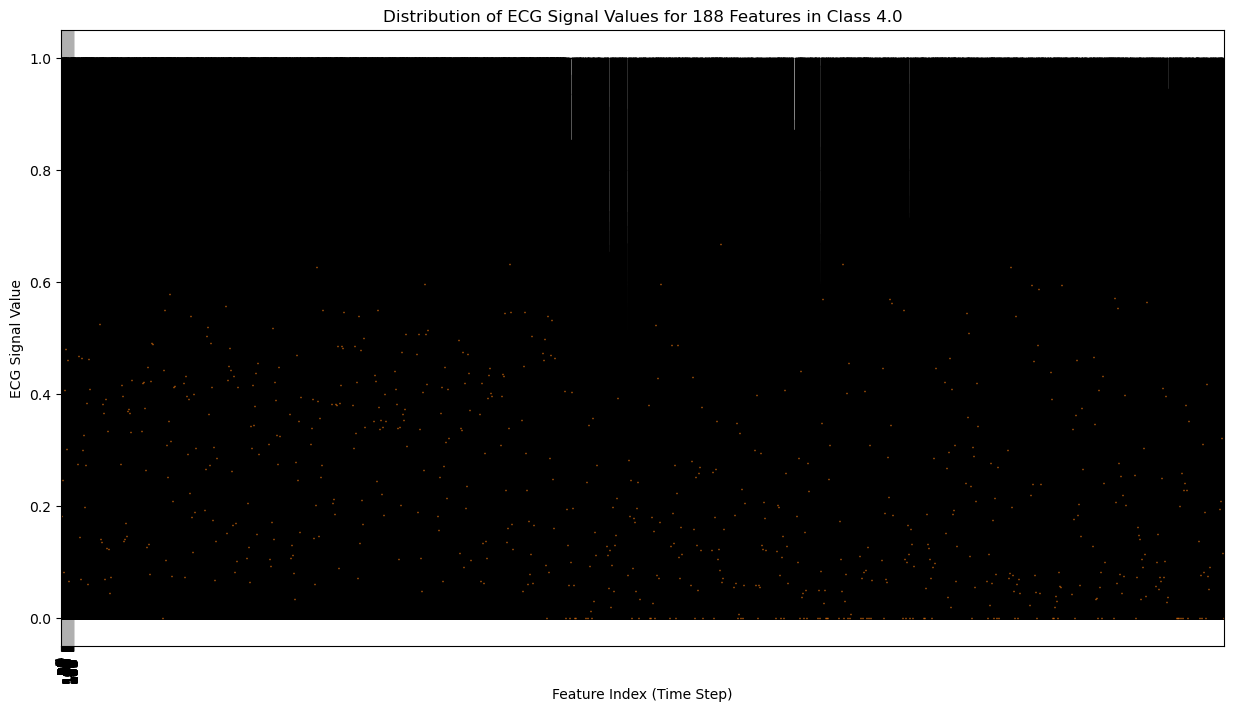

In [169]:
# import matplotlib.pyplot as plt

# labels = df_combined.iloc[:, -1]
# # Plot box plots for each class
# plt.figure(figsize=(10, 6))
# for label in labels.unique():
#     class_data = df_combined[df_combined.iloc[:, -1] == label].iloc[:, :-1]
#     positions = range(187)
#     plt.boxplot(class_data.values, positions=positions, widths=0.6)
#     plt.xlabel('Class Label')
#     plt.ylabel('ECG Signal Value')
#     plt.title('Distribution of ECG Signal Values for Each Class')
#     plt.grid(True)
#     plt.show()
import matplotlib.pyplot as plt

# Plot box plots for each sample within each class
# Prepare data for box plots for each class separately
class_data = [df_combined[df_combined.iloc[:, -1] == label].iloc[:, :-1] for label in labels.unique()]

# Generate a box plot for each class
for i, data in enumerate(class_data):
    plt.figure(figsize=(15, 8))
    plt.boxplot(data.values.T, widths=0.6, showfliers=False)
    plt.title(f'Distribution of ECG Signal Values for 188 Features in Class {labels.unique()[i]}')
    plt.xlabel('Feature Index (Time Step)')
    plt.ylabel('ECG Signal Value')
    plt.xticks(range(1, 189), rotation=90)  # Adjust x-ticks to match 188 features
    plt.grid(True)
    plt.show()

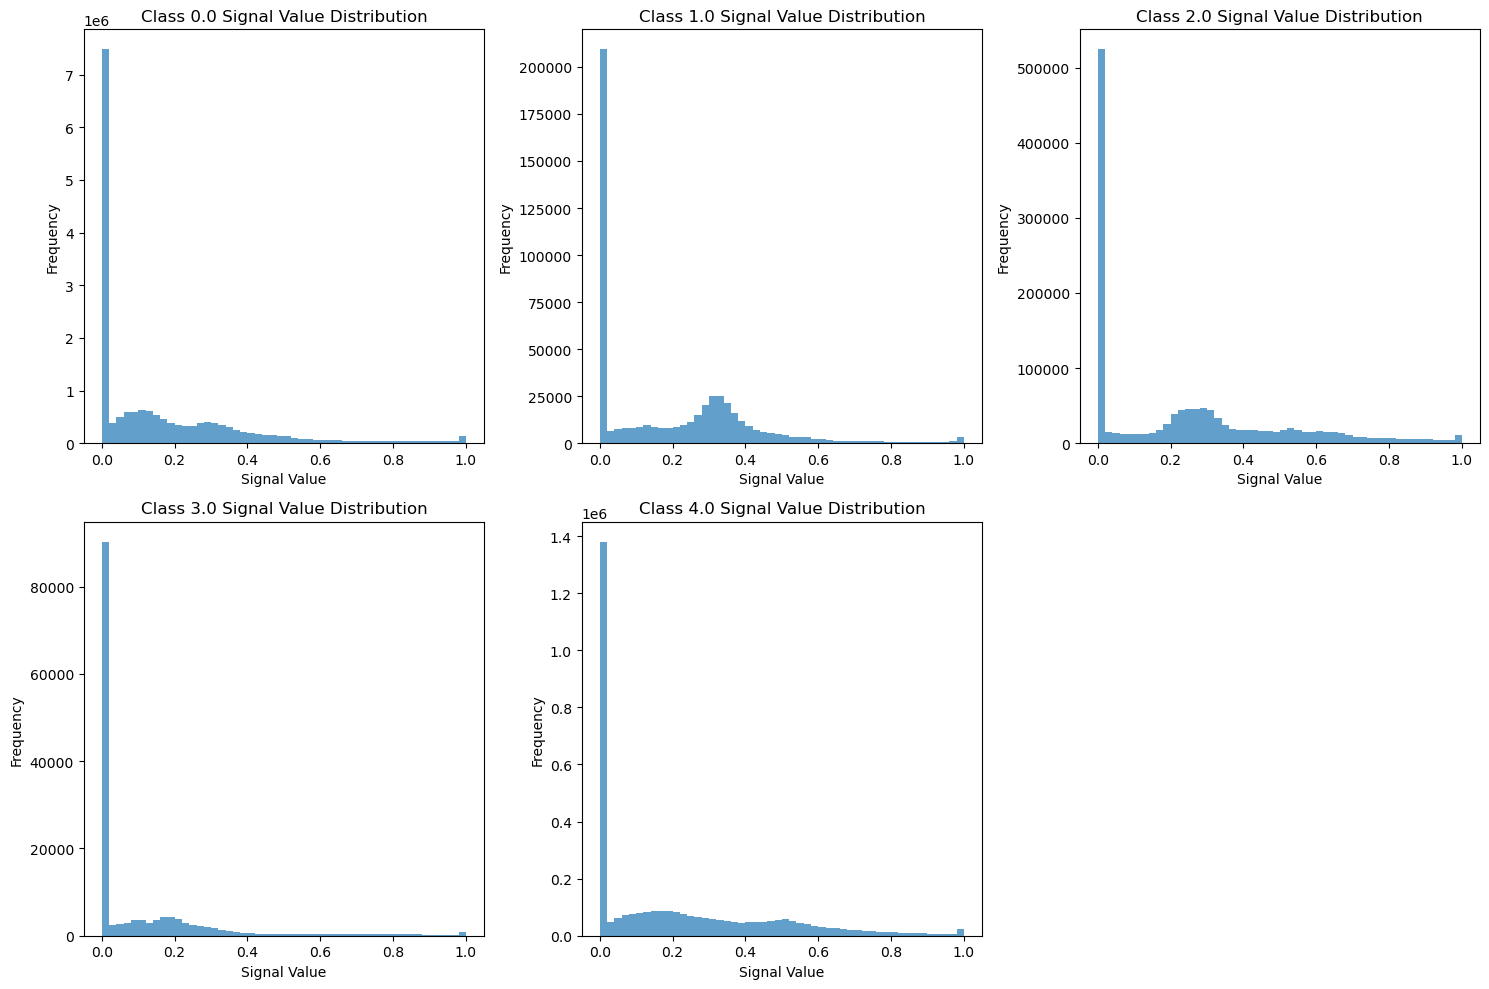

In [157]:
# Plot histograms of ECG values for each class
plt.figure(figsize=(15, 10))

for i, label in enumerate(labels.unique()):
    plt.subplot(2, 3, i+1)
    plt.hist(df_combined[df_combined.iloc[:, -1] == label].iloc[:, :-1].values.flatten(), bins=50, alpha=0.7)
    plt.title(f"Class {label} Signal Value Distribution")
    plt.xlabel('Signal Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
